# import necessary files for training 

In [28]:
from keras.datasets import mnist
from keras import models,layers,callbacks
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from time import sleep,time

# read and pretrain data

In [29]:
(traindata,trainlabel),(testdata,testlabel) = mnist.load_data()

# show some of train data

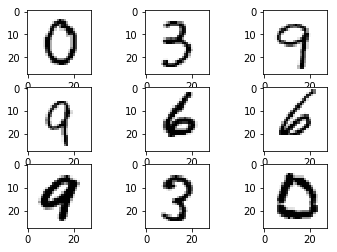

In [3]:
plt.subplot(3,3,1)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,2)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,3)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,4)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,5)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,6)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,7)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,8)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')
plt.subplot(3,3,9)
plt.imshow(traindata[randint(0,len(traindata))],cmap='binary')

# Change labels onehot

In [4]:
def to_one_hot(labels,dimention = 10):
    resalts = np.zeros((len(labels),dimention))
    for i , labels in enumerate(labels):
        resalts[i,labels] = 1.
    return resalts

In [5]:
train_y = to_one_hot(trainlabel)

In [6]:
test_y = to_one_hot(testlabel)

# reshape input data for train

In [7]:
traindata = traindata.reshape(traindata.shape[0], 28, 28, 1)
testdata = testdata.reshape(testdata.shape[0], 28, 28, 1)

In [8]:
train_x = traindata.astype('float32')
test_x = testdata.astype('float32')
train_x /= 255
test_x /= 255

# Separate train and validation

In [10]:
pre_train_x = train_x[1000:]
pre_train_y = train_y[1000:]
val_x =train_x[:1000]
val_y = train_y[:1000]

# create model for train 

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# compile model with Specific optimizer and lost function

In [15]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

# fit model for train with timer

In [34]:
start_time=time()
history = model.fit(pre_train_x,pre_train_y,epochs=5,batch_size=64 , validation_data=(val_x,val_y),callbacks=[My_Callback()])
print('Training took {} seconds'.format(time()-start_time))

Train on 59000 samples, validate on 1000 samples
Epoch 1/5
59000/59000 [==============================] - 200s 3ms/step - loss: 0.0565 - acc: 0.9835 - val_loss: 0.0510 - val_acc: 0.9870
Epoch 2/5
59000/59000 [==============================] - 257s 4ms/step - loss: 0.0542 - acc: 0.9843 - val_loss: 0.0451 - val_acc: 0.9910
Epoch 3/5
59000/59000 [==============================] - 283s 5ms/step - loss: 0.0554 - acc: 0.9845 - val_loss: 0.0548 - val_acc: 0.9890
Epoch 4/5
59000/59000 [==============================] - 257s 4ms/step - loss: 0.0583 - acc: 0.9832 - val_loss: 0.0620 - val_acc: 0.9840
Epoch 5/5
59000/59000 [==============================] - 259s 4ms/step - loss: 0.0582 - acc: 0.9837 - val_loss: 0.0543 - val_acc: 0.9900
Training took 1305.572749376297 seconds


# predict new data from trained model

In [18]:
predict = model.predict(test_x)

# predict prcent

In [19]:
count = 0
for i in range(len(predict)):
    if np.argmax(predict[i]) == np.argmax(test_y[i]):
        count += 1
print('predict = '+str(round((count*100)/len(predict),3))+'%')

predict = 98.8%


# random of value

predicted value = 6


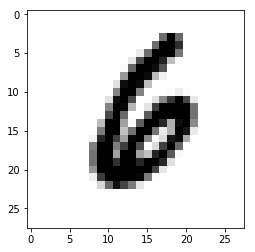

In [87]:
randi = randint(0,len(testdata))
plt.imshow(testdata[randi],cmap='binary')
print('predicted value = '+str(np.argmax(predict[randi])))

# show loss and accuracy data in chart

In [20]:
history_dict = history.history

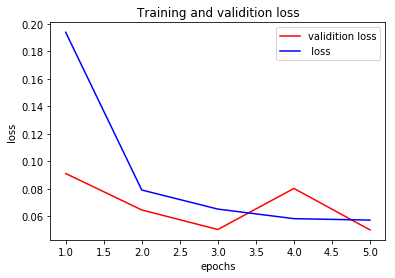

In [21]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_loss'],'r-',label='validition loss')
plt.plot(epochs ,history_dict['loss'],'b',label=' loss')
plt.title('Training and validition loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

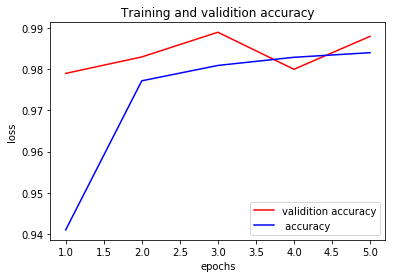

In [22]:
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs ,history_dict['val_acc'],'r-',label='validition accuracy')
plt.plot(epochs ,history_dict['acc'],'b',label=' accuracy')
plt.title('Training and validition accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#github.com/aidinze